In [7]:
import math
import numpy as np

import pandas as pd


In [2]:
data = [[2,0], [1,3], [3,5],[2,2], [4,6]]
print(data)


[[2, 0], [1, 3], [3, 5], [2, 2], [4, 6]]


In [3]:
# (x1, y1) and (x2, y2) --> geo dist = sqrt((x1-x2)^2 + (y1-y2)^2)
def geo_dist (p1, p2): # given point1 and point2
    return math.sqrt(((p1[0] - p2[0]) **2 + (p1[1] - p2[1]) **2))

def centroids(data):
    x, y = zip(*data)
    l = len(x)
    return sum(x) / l, sum(y) / l


In [4]:
# Round 1: picking point 2 and point 4 as centroids
p2 = data[1]
p4 = data[3]

p1 = data[0]
p3 = data[2]
p5 = data[4]

geo_distances = []
geo_distances.append([geo_dist(p1, p2), geo_dist(p1, p4)])
geo_distances.append([geo_dist(p3, p2), geo_dist(p3, p4)])
geo_distances.append([geo_dist(p5, p2), geo_dist(p5, p4)])

print ('p1:', geo_dist(p1, p2), geo_dist(p1, p4))
print ('p3:', geo_dist(p3, p2), geo_dist(p3, p4))
print ('p5:', geo_dist(p5, p2), geo_dist(p5, p4))

geo_distances

p1: 3.1622776601683795 2.0
p3: 2.8284271247461903 3.1622776601683795
p5: 4.242640687119285 4.47213595499958


[[3.1622776601683795, 2.0],
 [2.8284271247461903, 3.1622776601683795],
 [4.242640687119285, 4.47213595499958]]

In [6]:

# making clusters & selecting new centroid
c1 = np.array([p2, p3, p5])
c2 = np.array([p4, p1])

c1, c2


(array([[1, 3],
        [3, 5],
        [4, 6]]),
 array([[2, 2],
        [2, 0]]))

In [8]:
'''
Computing the geometric distance between a centroid and a data_point.
'''
def geo_distance(centroid, data_point):
    sum_of_squares = 0
    for i in range(len(centroid)):
        sum_of_squares += (centroid[i] - data_point[i]) ** 2
    return math.sqrt(sum_of_squares)

'''
Compute all the distances of a data_points set against the centroids.
'''
def get_geo_distances(centroids, data_points):
    distances_from_centroids = []
    for i in range(len(centroids)):
        distances = []
        for j in range(len(data_points)):
            distances.append(geo_distance(centroids.iloc[i].tolist(),
                                          data_points.iloc[j].tolist()))
        distances_from_centroids.append(distances)

    return pd.DataFrame(distances_from_centroids).transpose()

'''
Make a set of clusters based on the distances between data_points and centroids.
'''
def make_clusters_from_distances(distances, centroids, data_points, include_centroids=True):
    ## creating a new set of clusters based on the distances.
    #     return centroids
    clusters = []
    for i in range(len(centroids)):
        if include_centroids:
            clusters.append(pd.DataFrame([centroids.iloc[i]]))
        else:
            clusters.append(pd.DataFrame())

    display_clusters(clusters)

    for i in range(len(distances)):
        min_idx = distances.iloc[i].idxmin()
        clusters[min_idx] = clusters[min_idx].append([data_points.iloc[i]])

    return clusters

'''
Displaying the clusters ...
'''
def display_clusters(clusters):
    for cluster in clusters:
        display(cluster)

'''
Computing centroids for a given set of clusters.
'''
def get_centroids (clusters):
    centroids = pd.DataFrame()
    for cluster in clusters:
        centroids = centroids.append([cluster.mean()])
    return centroids

'''
Creating a clusters using k-means algorigthm.
'''
def kmeans(data, num_clusters=2, iteration=10):
    if len(data) < num_clusters:
        print('*** list is smaller than number of clusters ... ***')
        return

    ## First, we select initial centroid point by randomly
    ## pick num_cluster points from the list (without replacement)

    centroid_indice = np.random.choice(np.arange(len(data)), num_clusters, replace=False)
    remaining_data = data.drop(centroid_indice)
    centroids = data.iloc[centroid_indice]

    ### Get Geo Distances for all the remaining data points
    distances = get_geo_distances(centroids, remaining_data)

    ## creating a new set of clusters based on the distances.
    #     return centroids
    clusters = make_clusters_from_distances(distances, centroids, remaining_data)

    ### End of getting an initial clusters.

    # print('iteration begins ...')
    for i in range(iteration):
        centroids = get_centroids(clusters)
        distances = get_geo_distances(centroids, data)
        clusters  = make_clusters_from_distances(distances, centroids, data, include_centroids=False)

    return clusters

def get_cluster_ids_by_distances(distances, centroids):
    cluster_ids = []
    for i in range(len(distances)):
        min_idx = distances.iloc[i].idxmin()
        cluster_ids.append(min_idx)
    return cluster_ids

def kmeans_fit(clusters, test_data):
    cluster_indice = []
    centroids = get_centroids(clusters)
    distances = get_geo_distances(centroids, test_data)
    return get_cluster_ids_by_distances(distances, centroids)


In [9]:
# Test dataset.
pd_data = pd.DataFrame([[2.0,0.0], [1.0,3.0], [3.0,5.0],[2.0,2.0], [4.0,6.0]])
num_clusters = 2


clusters = kmeans(pd_data, num_clusters)
display_clusters(clusters)
kmeans_fit(clusters, pd_data)

,0,1
4,4.0,6.0


,0,1
3,2.0,2.0


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


,0,1
2,3.0,5.0
4,4.0,6.0


,0,1
0,2.0,0.0
1,1.0,3.0
3,2.0,2.0


[1, 1, 0, 1, 0]

In [12]:
## Testing the kmeans with iris dataset
filename = '../data/iris.data'
pd_iris = pd.read_csv(filename, header=None, sep=",", names=["sepal.length", "sepal.width", "petal.length", "petal.width", "species"])
pd_iris

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
data = pd_iris.drop('species', axis=1).dropna() # Drop both Species column and NaN
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
clusters = kmeans(data, 3)
display_clusters(clusters)

species = kmeans_fit(clusters, data)
for i in range(len(species)):
    print (i, species[i])


,sepal.length,sepal.width,petal.length,petal.width
23,5.1,3.3,1.7,0.5


,sepal.length,sepal.width,petal.length,petal.width
47,4.6,3.2,1.4,0.2


,sepal.length,sepal.width,petal.length,petal.width
17,5.1,3.5,1.4,0.3


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


""


,sepal.length,sepal.width,petal.length,petal.width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal.length,sepal.width,petal.length,petal.width
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
6,4.6,3.4,1.4,0.3
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
24,4.8,3.4,1.9,0.2


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
7,5.0,3.4,1.5,0.2
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3


0 2
1 1
2 1
3 1
4 2
5 2
6 1
7 2
8 1
9 1
10 2
11 1
12 1
13 1
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 1
25 1
26 2
27 2
28 2
29 1
30 1
31 2
32 2
33 2
34 1
35 2
36 2
37 1
38 1
39 2
40 2
41 1
42 1
43 2
44 2
45 1
46 2
47 1
48 2
49 2
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 1
58 0
59 0
60 1
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 1
94 0
95 0
96 0
97 0
98 1
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0


In [ ]:
filename = '2_Image_Test.txt'
pd_image = pd.read_csv(filename, header=None, sep=",")
pd_image = pd_image.dropna() # Removing NaN
pd_image


# In[ ]:


clusters = kmeans(pd_image, num_clusters=10, iteration=1)
# predicted_numbers = kmeans_fit(clusters, pd_image)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data_out)
# predicted_numbers



predicted_numbers = kmeans_fit(clusters, pd_image)
predicted_numbers


# In[ ]:


answers = [0] * len(pd_image)
answers = np.empty(len(pd_image), dtype=object)
for i in range(len(clusters)):
    answers[clusters[i].index] = i

pd_answers = pd.DataFrame(answers)
display(pd_answers)


# In[ ]:


x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 8, 9, 10])
dist = (np.linalg.norm(x-y))

print("Series 1:")
print(x)

print("Series 2:")
print(y)

print("Euclidean distance between two series is:", dist)


# In[ ]:


import math
# One dimensional Point

# Coordinate of Point P
P = 3

# Coordinates of point Q
Q = -8

# Calculate the Euclidean distance
# between points P and Q
eDistance = math.dist([P], [Q])
print(eDistance)


# In[ ]:#!/usr/bin/env python
# coding: utf-8

# # Computing K-Means
#

# In[ ]:


import math


# In[ ]:


data = [[2,0], [1,3], [3,5],[2,2], [4,6]]
print(data)


# In[ ]:


# (x1, y1) and (x2, y2) --> geo dist = sqrt((x1-x2)^2 + (y1-y2)^2)
def geo_dist (p1, p2): # given point1 and point2
    return math.sqrt(((p1[0] - p2[0]) **2 + (p1[1] - p2[1]) **2))

def centroids(data):
    x, y = zip(*data)
    l = len(x)
    return sum(x) / l, sum(y) / l


# In[ ]:


# Round 1: picking point 2 and point 4 as centroids
p2 = data[1]
p4 = data[3]

p1 = data[0]
p3 = data[2]
p5 = data[4]

geo_distances = []
geo_distances.append([geo_dist(p1, p2), geo_dist(p1, p4)])
geo_distances.append([geo_dist(p3, p2), geo_dist(p3, p4)])
geo_distances.append([geo_dist(p5, p2), geo_dist(p5, p4)])

print ('p1:', geo_dist(p1, p2), geo_dist(p1, p4))
print ('p3:', geo_dist(p3, p2), geo_dist(p3, p4))
print ('p5:', geo_dist(p5, p2), geo_dist(p5, p4))

geo_distances


# In[ ]:


import numpy as np
# making clusters & selecting new centroid
c1 = np.array([p2, p3, p5])
c2 = np.array([p4, p1])

c1, c2


# ## Coding K-Means

# In[ ]:


import pandas as pd

'''
Computing the geometric distance between a centroid and a data_point.
'''
def geo_distance(centroid, data_point):
    sum_of_squares = 0
    for i in range(len(centroid)):
        sum_of_squares += (centroid[i] - data_point[i]) ** 2
    return math.sqrt(sum_of_squares)

'''
Compute all the distances of a data_points set against the centroids.
'''
def get_geo_distances(centroids, data_points):
    distances_from_centroids = []
    for i in range(len(centroids)):
        distances = []
        for j in range(len(data_points)):
            distances.append(geo_distance(centroids.iloc[i].tolist(),
                                          data_points.iloc[j].tolist()))
        distances_from_centroids.append(distances)

    return pd.DataFrame(distances_from_centroids).transpose()

'''
Make a set of clusters based on the distances between data_points and centroids.
'''
def make_clusters_from_distances(distances, centroids, data_points, include_centroids=True):
    ## creating a new set of clusters based on the distances.
    #     return centroids
    clusters = []
    for i in range(len(centroids)):
        if include_centroids:
            clusters.append(pd.DataFrame([centroids.iloc[i]]))
        else:
            clusters.append(pd.DataFrame())

    display_clusters(clusters)

    for i in range(len(distances)):
        min_idx = distances.iloc[i].idxmin()
        clusters[min_idx] = clusters[min_idx].append([data_points.iloc[i]])

    return clusters

'''
Displaying the clusters ...
'''
def display_clusters(clusters):
    for cluster in clusters:
        display(cluster)

'''
Computing centroids for a given set of clusters.
'''
def get_centroids (clusters):
    centroids = pd.DataFrame()
    for cluster in clusters:
        centroids = centroids.append([cluster.mean()])
    return centroids

'''
Creating a clusters using k-means algorigthm.
'''
def kmeans(data, num_clusters=2, iteration=10):
    if len(data) < num_clusters:
        print('*** list is smaller than number of clusters ... ***')
        return

    ## First, we select initial centroid point by randomly
    ## pick num_cluster points from the list (without replacement)

    centroid_indice = np.random.choice(np.arange(len(data)), num_clusters, replace=False)
    remaining_data = data.drop(centroid_indice)
    centroids = data.iloc[centroid_indice]

    ### Get Geo Distances for all the remaining data points
    distances = get_geo_distances(centroids, remaining_data)

    ## creating a new set of clusters based on the distances.
    #     return centroids
    clusters = make_clusters_from_distances(distances, centroids, remaining_data)

    ### End of getting an initial clusters.

    # print('iteration begins ...')
    for i in range(iteration):
        centroids = get_centroids(clusters)
        distances = get_geo_distances(centroids, data)
        clusters  = make_clusters_from_distances(distances, centroids, data, include_centroids=False)

    return clusters

def get_cluster_ids_by_distances(distances, centroids):
    cluster_ids = []
    for i in range(len(distances)):
        min_idx = distances.iloc[i].idxmin()
        cluster_ids.append(min_idx)
    return cluster_ids

def kmeans_fit(clusters, test_data):
    cluster_indice = []
    centroids = get_centroids(clusters)
    distances = get_geo_distances(centroids, test_data)
    return get_cluster_ids_by_distances(distances, centroids)



# In[ ]:


# Test dataset.
pd_data = pd.DataFrame([[2.0,0.0], [1.0,3.0], [3.0,5.0],[2.0,2.0], [4.0,6.0]])
num_clusters = 2


clusters = kmeans(pd_data, num_clusters)
display_clusters(clusters)
kmeans_fit(clusters, pd_data)


# In[ ]:


## Testing the kmeans with iris dataset
filename = 'iris.data'
pd_iris = pd.read_csv(filename, header=None, sep=",", names=["sepal.length", "sepal.width", "petal.length", "petal.width", "species"])
pd_iris


# In[ ]:


data = pd_iris.drop('species', axis=1).dropna() # Drop both Species column and NaN
data


# In[ ]:


clusters = kmeans(data, 3)
display_clusters(clusters)


# In[ ]:


species = kmeans_fit(clusters, data)
for i in range(len(species)):
    print (i, species[i])


# # Images data

# In[ ]:


filename = '2_Image_Test.txt'
pd_image = pd.read_csv(filename, header=None, sep=",")
pd_image = pd_image.dropna() # Removing NaN
pd_image


# In[ ]:


clusters = kmeans(pd_image, num_clusters=10, iteration=1)
# predicted_numbers = kmeans_fit(clusters, pd_image)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data_out)
# predicted_numbers


# In[ ]:


predicted_numbers = kmeans_fit(clusters, pd_image)
predicted_numbers


# In[ ]:


answers = [0] * len(pd_image)
answers = np.empty(len(pd_image), dtype=object)
for i in range(len(clusters)):
    answers[clusters[i].index] = i

pd_answers = pd.DataFrame(answers)
display(pd_answers)


# In[ ]:


x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 8, 9, 10])
dist = (np.linalg.norm(x-y))

print("Series 1:")
print(x)

print("Series 2:")
print(y)

print("Euclidean distance between two series is:", dist)


# In[ ]:


import math
# One dimensional Point

# Coordinate of Point P
P = 3

# Coordinates of point Q
Q = -8

# Calculate the Euclidean distance
# between points P and Q
eDistance = math.dist([P], [Q])
print(eDistance)




# K-Means Clustering of Iris dataset
From this website: `https://www.kaggle.com/khotijahs1/k-means-clustering-of-iris-dataset`. The dataset has five (5) attributes and they are described as follows:
        
### Attribute Information:

```
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. species:
-- iris-setosa
-- iris-versicolour
-- iris-virginica
```


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


In [35]:
iris = pd.read_csv("../data/iris.data")
x = iris.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
iris.info
iris[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [37]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [38]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

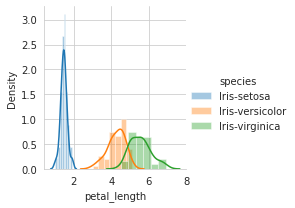

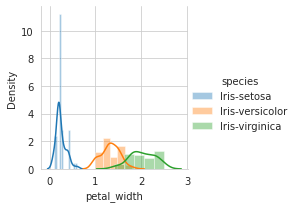

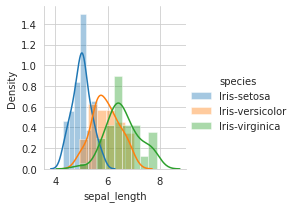

In [39]:
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

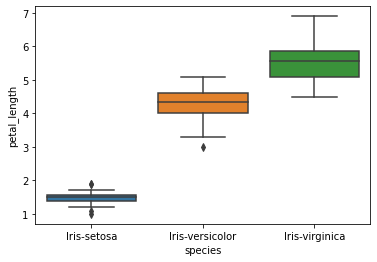

In [25]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()


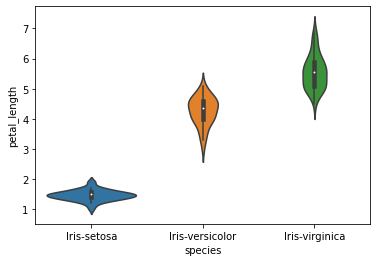

In [26]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

/home/student/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


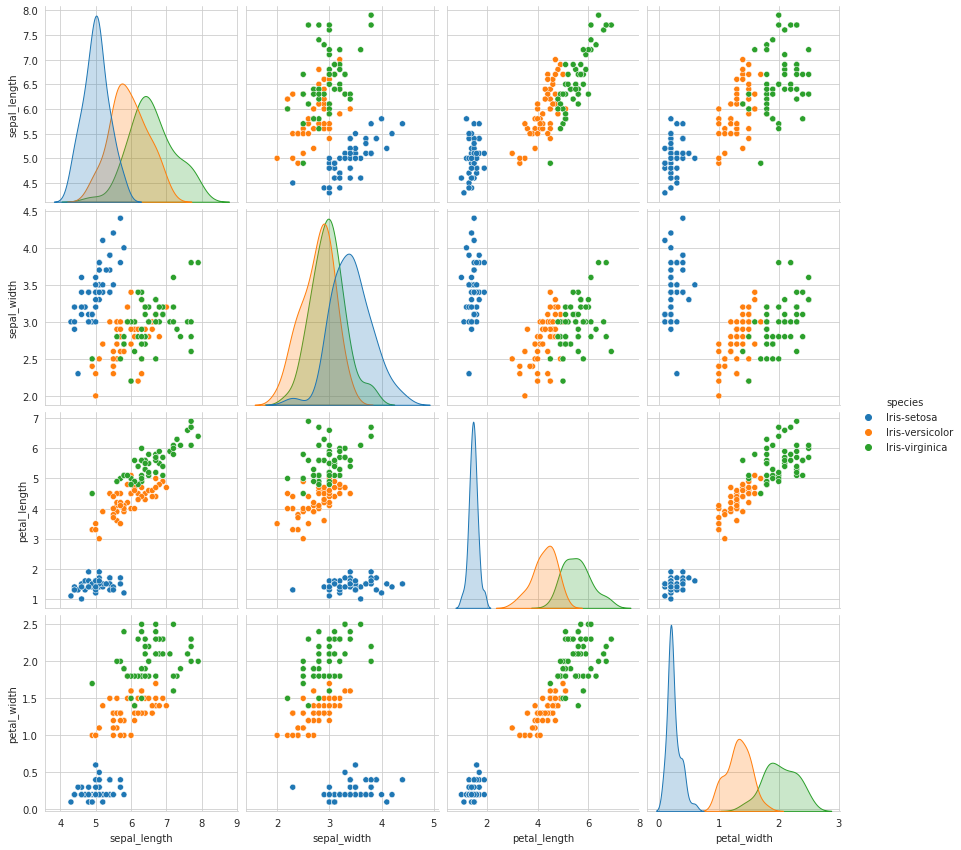

In [27]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()


## K-Means
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.


In [28]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

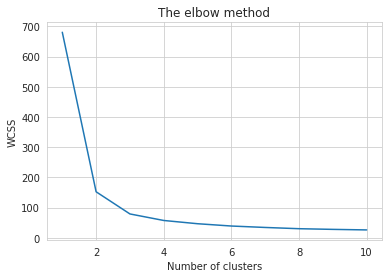

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

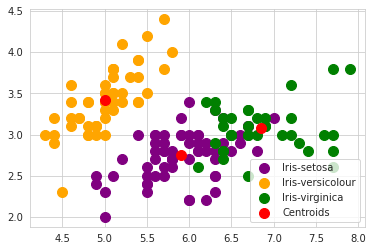

In [31]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

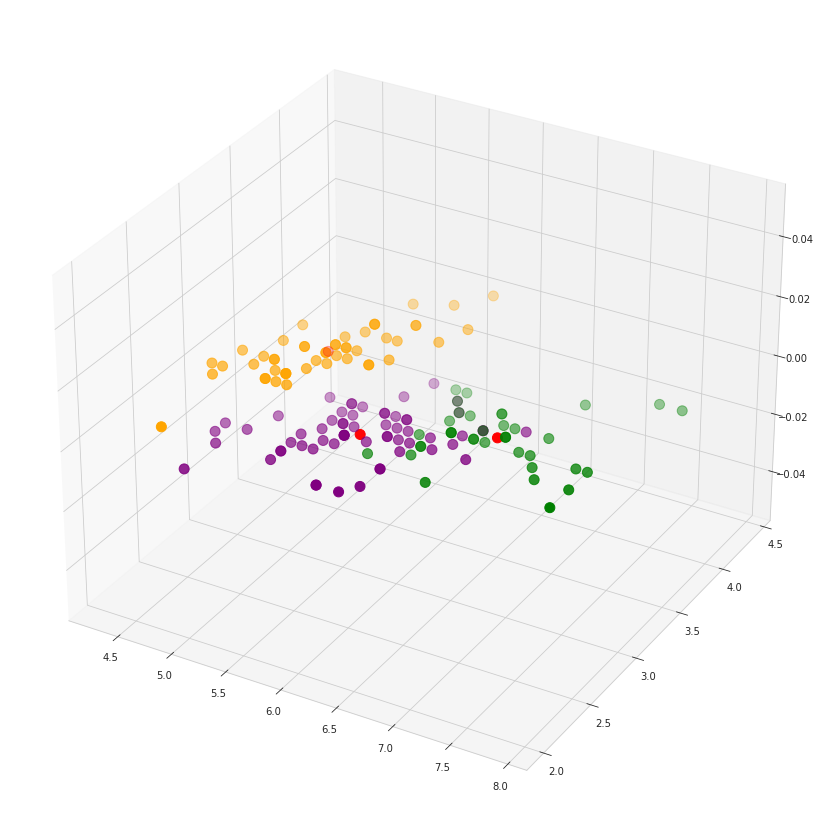

In [32]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()